# Supervised Data Mining (Classification)

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [288]:
data = pd.read_csv('bank.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [289]:
dataset.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


In [291]:
data['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [292]:
#checking for missing values in dataset
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [293]:
data['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [294]:
#Frequency of 'subscribed'
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

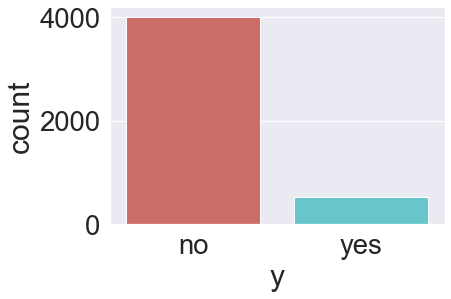

<Figure size 432x288 with 0 Axes>

In [295]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [296]:
#Normalizing the frequency table of 'Subscribed' variable
data['y'].value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

From the above analysis we can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%.

In [297]:
data.groupby('y').mean()

age      balance        day    duration  campaign      pdays  \
y                                                                         
no   40.998000  1403.211750  15.948750  226.347500  2.862250  36.006000   
yes  42.491363  1571.955854  15.658349  552.742802  2.266795  68.639155   

     previous  
y              
no   0.471250  
yes  1.090211

In [298]:
#Analysis 'job'
#Frequency table
data['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

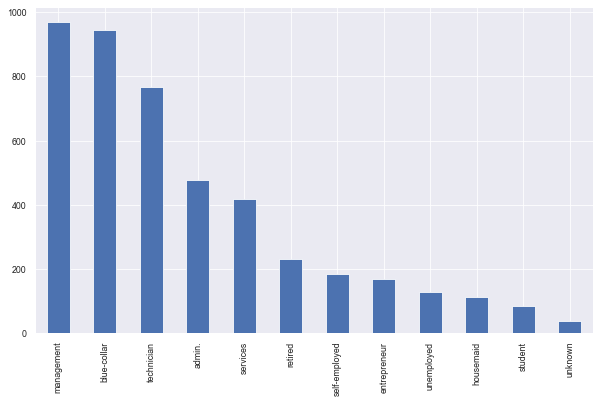

In [299]:
# Plotting the job frequency table
sns.set_context('paper')
data['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [300]:
# Analysing 'marital'
data['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

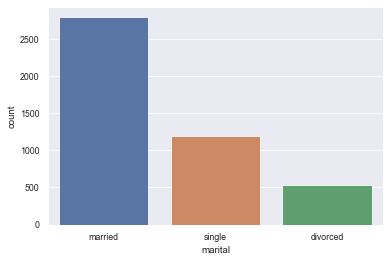

In [301]:
sns.countplot(data=data, x='marital');

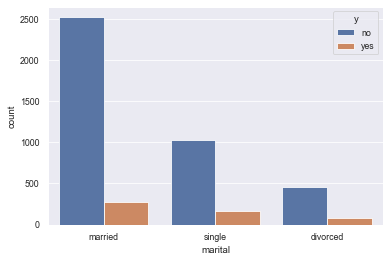

In [302]:
sns.countplot(data=data, x='marital', hue='y');

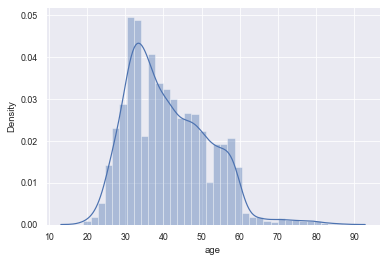

In [303]:
# Analysing 'age'
sns.distplot(data['age']);

In [304]:
#default vs subscription
pd.crosstab(data['default'], data['y'])

y          no  yes
default           
no       3933  512
yes        67    9

In [305]:
#job vs subscribed
pd.crosstab(data['job'],data['y'])

y               no  yes
job                    
admin.         420   58
blue-collar    877   69
entrepreneur   153   15
housemaid       98   14
management     838  131
retired        176   54
self-employed  163   20
services       379   38
student         65   19
technician     685   83
unemployed     115   13
unknown         31    7

In [306]:
#Marital status vs subscribed
pd.crosstab(data['marital'], data['y'])

y           no  yes
marital            
divorced   451   77
married   2520  277
single    1029  167

In [307]:
# Converting the target variables into 0s and 1s
data['y'].replace('no', 0,inplace=True)
data['y'].replace('yes', 1,inplace=True)
data['y']

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [308]:
#Correlation matrix
dc = data.corr()
dc

age   balance       day  duration  campaign     pdays  \
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894   
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437   
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352   
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380   
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137   
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000   
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562   
y         0.045092  0.017905 -0.011244  0.401118 -0.061147  0.104087   

          previous         y  
age      -0.003511  0.045092  
balance   0.026196  0.017905  
day      -0.059114 -0.011244  
duration  0.018080  0.401118  
campaign -0.067833 -0.061147  
pdays     0.577562  0.104087  
previous  1.000000  0.116714  
y         0.116714  1.000000

<AxesSubplot:>

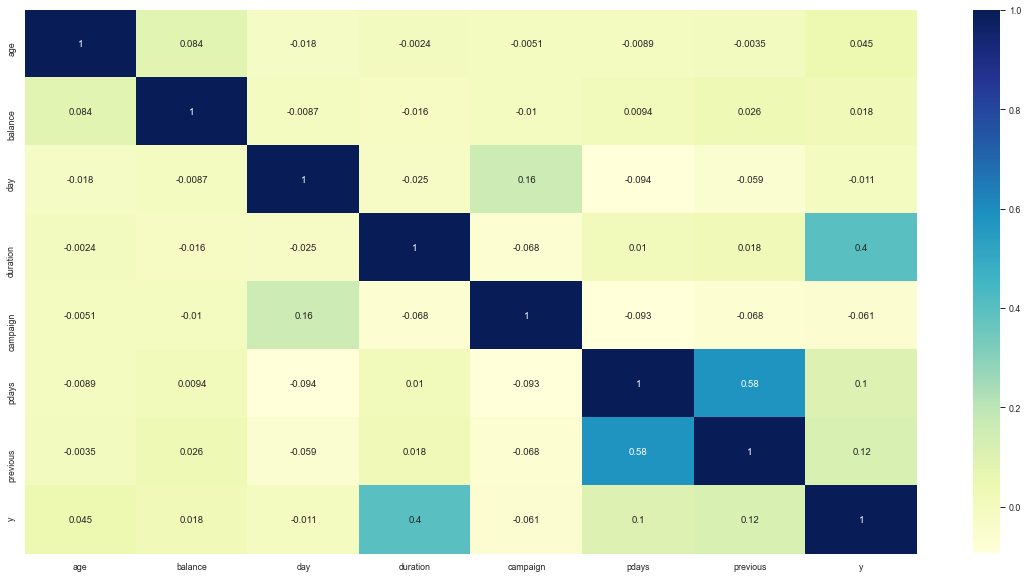

In [309]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(dc, annot=True, cmap='YlGnBu')

In [310]:
target = data['y']
data = data.drop('y', axis=1)

In [311]:
#generating dummy values on the dataset
data = pd.get_dummies(data)
data.head()

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   30     1787   19        79         1     -1         0           0   
1   33     4789   11       220         1    339         4           0   
2   35     1350   16       185         1    330         1           0   
3   30     1476    3       199         4     -1         0           0   
4   59        0    5       226         1     -1         0           0   

   job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
0                0                 0  ...          0          0          0   
1                0                 0  ...          0          0          1   
2                0                 0  ...          0          0          0   
3                0                 0  ...          1          0          0   
4                1                 0  ...          0          0          1   

   month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0          0          1          0                 0               0   
1          0          0          0                 1               0   
2          0          0          0                 1               0   
3          0          0          0                 0               0   
4          0          0          0                 0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 0  
2                 0                 0  
3                 0                 1  
4                 0                 1  

[5 rows x 51 columns]

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.2, random_state=12)

# Random Forest Classifier

In [313]:
from sklearn.ensemble import RandomForestClassifier

In [314]:
#creating an object of random forest classifier
rfclf = RandomForestClassifier()
rfclf.fit(X_train,y_train)

RandomForestClassifier()

In [315]:
#Making predictions and Accuracy
y_pred = rfclf.predict(X_val)

print("Accuracy of Random forest classifier on dataset:",metrics.accuracy_score(y_val, y_pred))

Accuracy of Random forest classifier on dataset: 0.8983425414364641


In [316]:
from sklearn.metrics import classification_report

In [317]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       792
           1       0.76      0.27      0.40       113

    accuracy                           0.90       905
   macro avg       0.83      0.63      0.67       905
weighted avg       0.89      0.90      0.88       905



In [318]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[782  10]
 [ 82  31]]


The result is telling us that we have 775+17 correct predictions and 85+28 incorrect predictions.

In [319]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

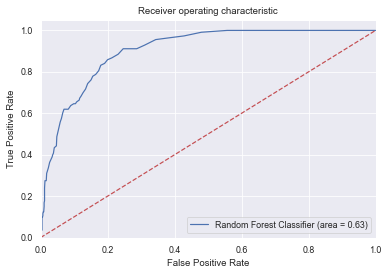

In [320]:
rf_roc_auc = roc_auc_score(y_val, rfclf.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, rfclf.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# Naive Bayes Classifier

In [321]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [322]:
#creating an object of Naive Bayes classifier
nbclf = GaussianNB()
nbclf.fit(X_train,y_train)

GaussianNB()

In [323]:
#Predict the response for dataset
y_pred = nbclf.predict(X_val)
print("Accuracy of Naive Bayes classifier on dataset:",metrics.accuracy_score(y_val, y_pred))

Accuracy of Naive Bayes classifier on dataset: 0.8232044198895028


In [324]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       792
           1       0.35      0.48      0.40       113

    accuracy                           0.82       905
   macro avg       0.63      0.68      0.65       905
weighted avg       0.85      0.82      0.83       905



In [325]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[691 101]
 [ 59  54]]


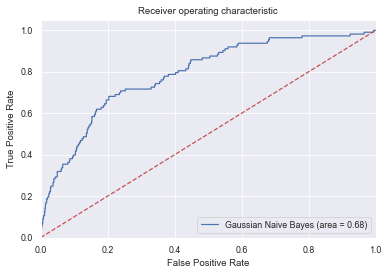

In [326]:
rf_roc_auc = roc_auc_score(y_val, nbclf.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, nbclf.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

# KNN, K-Nearest Neighbor Classifier

In [327]:
from sklearn.neighbors import KNeighborsClassifier

In [328]:
knclf = KNeighborsClassifier(n_neighbors=3)
knclf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [329]:
#Predict the response for dataset
y_pred = knclf.predict(X_val)
print("Accuracy of K-Nearest Neighbor classifier on dataset:",metrics.accuracy_score(y_val, y_pred))

Accuracy of K-Nearest Neighbor classifier on dataset: 0.8574585635359117


In [330]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       792
           1       0.39      0.26      0.31       113

    accuracy                           0.86       905
   macro avg       0.65      0.60      0.62       905
weighted avg       0.84      0.86      0.84       905



In [331]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[747  45]
 [ 84  29]]


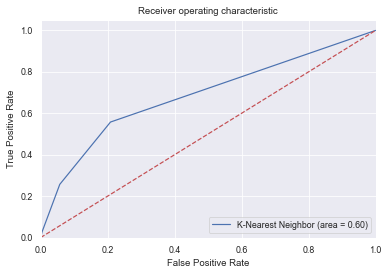

In [332]:
rf_roc_auc = roc_auc_score(y_val, knclf.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, knclf.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='K-Nearest Neighbor (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

## comparison of classification accuracies between the classification algorithms

In [333]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.svm import SVC
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.25, random_state=8675309)

In [334]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    
    dfs = []
models = [ 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('GNB', GaussianNB())
        ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['malignant', 'benign']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        print(name)
        print(classification_report(y_val, y_pred, target_names=target_names))
results.append(cv_results)
names.append(name)
this_df = pd.DataFrame(cv_results)
this_df['model'] = name
dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)

#return final


RF
              precision    recall  f1-score   support

   malignant       0.91      0.99      0.95      1001
      benign       0.73      0.25      0.38       130

    accuracy                           0.90      1131
   macro avg       0.82      0.62      0.66      1131
weighted avg       0.89      0.90      0.88      1131

KNN
              precision    recall  f1-score   support

   malignant       0.90      0.97      0.93      1001
      benign       0.42      0.15      0.22       130

    accuracy                           0.88      1131
   macro avg       0.66      0.56      0.58      1131
weighted avg       0.84      0.88      0.85      1131

GNB
              precision    recall  f1-score   support

   malignant       0.93      0.86      0.90      1001
      benign       0.33      0.52      0.40       130

    accuracy                           0.82      1131
   macro avg       0.63      0.69      0.65      1131
weighted avg       0.86      0.82      0.84      1131



In [335]:
seed = 10
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))


results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.895280 (0.011818)
NB: 0.828614 (0.013222)
KNN: 0.875221 (0.011275)


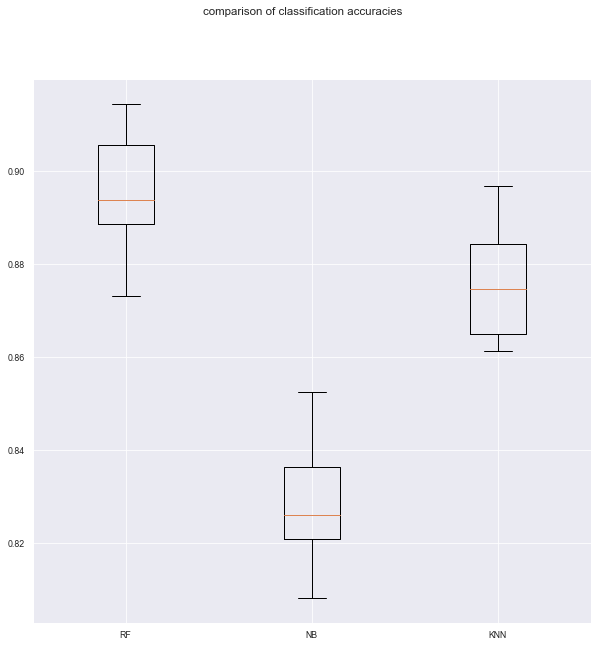

In [337]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('comparison of classification accuracies')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('comparison of classification accuracies')
plt.show()